In [1]:
import pandas as pd # for basic analysis
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data_15m = pd.read_csv("data folder/KDSH Data/btc_15m.csv")
data_15m['datetime'] = pd.to_datetime(data_15m['datetime'])
data_15m.set_index('datetime',inplace=True)
stationary_series_data_15m = data_15m.diff().dropna()
stationary_series_data_15m.to_csv("data folder/stationary_series_data_15m.csv",index=False)


data_3m = pd.read_csv("data folder/KDSH Data/btc_3m.csv")
data_3m['datetime'] = pd.to_datetime(data_3m['datetime'])
data_3m.set_index('datetime',inplace=True)
stationary_series_data_3m = data_3m.diff().dropna()
stationary_series_data_3m.to_csv("data folder/stationary_series_data_3m.csv",index=False)



data_5m = pd.read_csv("data folder/KDSH Data/btc_5m.csv")
data_5m['datetime'] = pd.to_datetime(data_5m['datetime'])
data_5m.set_index('datetime',inplace=True)
stationary_series_data_5m = data_5m.diff().dropna()
stationary_series_data_5m.to_csv("data folder/stationary_series_data_5m.csv",index=False)



data_30m = pd.read_csv("data folder/KDSH Data/btc_30m.csv")
data_30m['datetime'] = pd.to_datetime(data_30m['datetime'])
data_30m.set_index('datetime',inplace=True)
stationary_series_data_30m = data_30m.diff().dropna()
stationary_series_data_30m.to_csv("data folder/stationary_series_data_30m.csv",index=False)



data_1h = pd.read_csv("data folder/KDSH Data/btc_1h.csv")
data_1h['datetime'] = pd.to_datetime(data_1h['datetime'])
data_1h.set_index('datetime',inplace=True)
stationary_series_data_1h = data_1h.diff().dropna()
stationary_series_data_1h.to_csv("data folder/stationary_series_data_1h.csv",index=False)



data_2h = pd.read_csv("data folder/KDSH Data/btc_2h.csv")
data_2h['datetime'] = pd.to_datetime(data_2h['datetime'])
data_2h.set_index('datetime',inplace=True)
stationary_series_data_2h = data_2h.diff().dropna()
stationary_series_data_2h.to_csv("data folder/stationary_series_data_2h.csv",index=False)



data_4h = pd.read_csv("data folder/KDSH Data/btc_4h.csv")
data_4h['datetime'] = pd.to_datetime(data_4h['datetime'])
data_4h.set_index('datetime',inplace=True)
stationary_series_data_4h = data_4h.diff().dropna()
stationary_series_data_4h.to_csv("data folder/stationary_series_data_4h.csv",index=False)



data_6h = pd.read_csv("data folder/KDSH Data/btc_6h.csv")
data_6h['datetime'] = pd.to_datetime(data_6h['datetime'])
data_6h.set_index('datetime',inplace=True)
stationary_series_data_6h = data_6h.diff().dropna()
stationary_series_data_6h.to_csv("data folder/stationary_series_data_6h.csv",index=False)

# Train Test Split

In [4]:
# Determine the sizes for train, validation, and test sets
train_size = int(0.6 * len(stationary_series_data_3m))  # 60% for training
val_size = int(0.2 * len(stationary_series_data_3m))    # 20% for validation
test_size = len(stationary_series_data_3m) - train_size - val_size  # Remaining for testing

# Split the data into train, validation, and test sets
train_data = stationary_series_data_3m[:train_size]
val_data = stationary_series_data_3m[train_size:train_size + val_size]
test_data = stationary_series_data_3m[train_size + val_size:]

# Model Development?

In [22]:
df = stationary_series_data_6h[['open', 'high', 'low', 'close']].copy()

In [23]:
stationary_series_data_6h.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [27]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Load your multivariate time series data into a pandas DataFrame
# For example, assume you have two time series 'ts1' and 'ts2'
# df = pd.DataFrame({'ts1': ts1_values, 'ts2': ts2_values, ...})

# Ensure your data is in datetime format and is stationary
# Check stationarity and apply differencing if needed
def check_stationarity(series):
    result = adfuller(series)
    if result[1] > 0.05:
        return False
    else:
        return True

# Assuming your time series data is in DataFrame 'df'
for column in df.columns:
    if not check_stationarity(df[column]):
        df[column] = df[column].diff().dropna()

# Split the data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the VAR model
model = VAR(train)
order = 1  # Change the order based on your data and model performance
fitted_model = model.fit(order)

# Forecast
forecast = fitted_model.forecast(train.values, steps=len(test))

# Convert the forecast results to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Evaluate the model (for example, using RMSE)
for col in df.columns:
    print(f"RMSE for {col}: {rmse(test[col], forecast_df[col])}")


RMSE for open: 922.6805913965397
RMSE for high: 804.0200107738832
RMSE for low: 1042.643098883921
RMSE for close: 922.5139451452105


C:\Users\91845\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [29]:
forecast_df

,open,high,low,close
datetime,,,,
2021-04-08 11:30:00,918.551015,383.252846,570.149425,42.031147
2021-04-08 17:30:00,42.085817,55.772521,-48.387234,5.624613
2021-04-08 23:30:00,5.665183,-3.885375,43.728466,14.096472
2021-04-09 05:30:00,14.084993,16.269472,-5.904113,7.110148
2021-04-09 11:30:00,7.122328,6.420867,16.506541,10.094751
...,...,...,...,...
2022-01-30 05:30:00,9.169708,9.225102,9.113710,9.165461
2022-01-30 11:30:00,9.169708,9.225102,9.113710,9.165461
2022-01-30 17:30:00,9.169708,9.225102,9.113710,9.165461


# Moving avgs

In [32]:
import pandas as pd

# Assuming you have a DataFrame 'data' with a column 'values' representing your time series data
# Replace 'values' with the actual column name containing your time series data

# Calculate fast moving average (FMA)
fast_window = 10  # Define the window size for fast moving average
forecast_df['FMA'] = forecast_df['open'].rolling(window=fast_window, min_periods=1).mean()

# Calculate slow moving average (SMA)
slow_window = 50  # Define the window size for slow moving average
forecast_df['SMA'] = forecast_df['open'].rolling(window=slow_window, min_periods=1).mean()

# Print the DataFrame with FMA and SMA
forecast_df.head()


,open,high,low,close,FMA,SMA
datetime,,,,,,
2021-04-08 11:30:00,918.551015,383.252846,570.149425,42.031147,918.551015,918.551015
2021-04-08 17:30:00,42.085817,55.772521,-48.387234,5.624613,480.318416,480.318416
2021-04-08 23:30:00,5.665183,-3.885375,43.728466,14.096472,322.100672,322.100672
2021-04-09 05:30:00,14.084993,16.269472,-5.904113,7.110148,245.096752,245.096752
2021-04-09 11:30:00,7.122328,6.420867,16.506541,10.094751,197.501867,197.501867


In [43]:
forecast_df.reset_index()['datetime']

0      2021-04-08 11:30:00
1      2021-04-08 17:30:00
2      2021-04-08 23:30:00
3      2021-04-09 05:30:00
4      2021-04-09 11:30:00
               ...        
1187   2022-01-30 05:30:00
1188   2022-01-30 11:30:00
1189   2022-01-30 17:30:00
1190   2022-01-30 23:30:00
1191   2022-01-31 05:30:00
Name: datetime, Length: 1192, dtype: datetime64[ns]

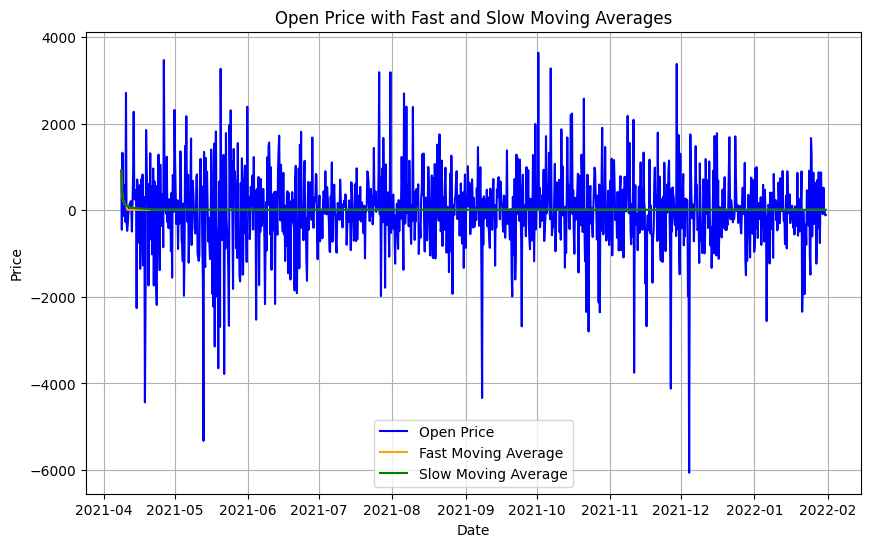

In [44]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.reset_index()['datetime'], test['open'], label='Open Price', color='blue')
plt.plot(data['datetime'], data['FMA'], label='Fast Moving Average', color='orange')
plt.plot(data['datetime'], data['SMA'], label='Slow Moving Average', color='green')

plt.title('Open Price with Fast and Slow Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
import numpy as np
import pandas as pd

# Example data (replace this with your actual data)
original_series = data_15m['open'].copy()
stationary_series = original_series.diff().dropna()  # Differencing to make it stationary

# Assume you made predictions on the stationary series
# Example predictions on the stationary data (replace this with your predictions)
# Here, for illustration, we'll just use the stationary series itself as predictions
stationary_predictions = stationary_series.copy()

# Calculate the cumulative sum of the predicted differences
predicted_original = np.cumsum(stationary_predictions)

# Add the first value of the original series to the cumulative sum
predicted_original = original_series.iloc[0] + predicted_original

# Display the original series and predicted values after inverse differencing
print("Original Series:")
print(original_series)

print("\nPredicted Values after Inverse Differencing:")
print(pd.Series(predicted_original, index=stationary_series.index))


Original Series:
datetime
2018-01-01 05:30:00    13715.65
2018-01-01 05:45:00    13533.75
2018-01-01 06:00:00    13500.00
2018-01-01 06:15:00    13494.65
2018-01-01 06:30:00    13528.99
                         ...   
2022-01-31 04:30:00    37785.78
2022-01-31 04:45:00    38183.75
2022-01-31 05:00:00    38060.24
2022-01-31 05:15:00    37959.87
2022-01-31 05:30:00    37881.75
Name: open, Length: 142610, dtype: float64

Predicted Values after Inverse Differencing:
datetime
2018-01-01 05:45:00    13533.75
2018-01-01 06:00:00    13500.00
2018-01-01 06:15:00    13494.65
2018-01-01 06:30:00    13528.99
2018-01-01 06:45:00    13469.99
                         ...   
2022-01-31 04:30:00    37785.78
2022-01-31 04:45:00    38183.75
2022-01-31 05:00:00    38060.24
2022-01-31 05:15:00    37959.87
2022-01-31 05:30:00    37881.75
Name: open, Length: 142609, dtype: float64
